In [387]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
import math
from collections import defaultdict
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

pd.options.mode.chained_assignment = None
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Spongebob\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Spongebob\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [388]:
#Reading merged business and review csv file.
restaurant = pd.read_csv("yelp_reviews_restaurants.csv")

In [389]:
#Exploratory Data Analysis

In [390]:
#Summary of restaurant.csv
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24117 entries, 0 to 24116
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   24117 non-null  object 
 1   name          24117 non-null  object 
 2   address       24117 non-null  object 
 3   city          24117 non-null  object 
 4   state         24117 non-null  object 
 5   stars         24117 non-null  float64
 6   review_count  24117 non-null  int64  
 7   is_open       24117 non-null  int64  
 8   attributes    24117 non-null  object 
 9   categories    24117 non-null  object 
 10  review_id     24117 non-null  object 
 11  user_id       24117 non-null  object 
 12  review_stars  24117 non-null  int64  
 13  text          24117 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 2.6+ MB


In [391]:
#First five rows of restaurant.csv
restaurant.head()

,business_id,name,address,city,state,stars,review_count,is_open,attributes,categories,review_id,user_id,review_stars,text
0,mvCO6pRpfMB0_1GLlwgZRw,Sushi California,388 W Broadway,Vancouver,BC,3.5,280,1,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'b...","Japanese, Restaurants, Sushi Bars",nZWz5hiAsH4p7qK5yCtzuw,FiLuPv1YhEMosMdJKY6fLQ,3,"Very affordable sushi joint, but I was disappo..."
1,mvCO6pRpfMB0_1GLlwgZRw,Sushi California,388 W Broadway,Vancouver,BC,3.5,280,1,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'b...","Japanese, Restaurants, Sushi Bars",xFJR_t-Et4sP_BCWR7mKYA,MRtLDOIlij6grb4GTXJgPg,5,"Love the food here! Always fresh, large portio..."
2,mvCO6pRpfMB0_1GLlwgZRw,Sushi California,388 W Broadway,Vancouver,BC,3.5,280,1,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'b...","Japanese, Restaurants, Sushi Bars",yUIHV1oDEZRITw75OLaeww,5lRQDrzXb8cJqIEouII0kA,4,Good sushi. The sashimi was fresh and the kimc...
3,mvCO6pRpfMB0_1GLlwgZRw,Sushi California,388 W Broadway,Vancouver,BC,3.5,280,1,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'b...","Japanese, Restaurants, Sushi Bars",YpYqke8Caon3sKpqxRPQeA,jpIGlAym6z88W2xzHiK5_A,4,This place always have long lineup. \nThe Cons...
4,mvCO6pRpfMB0_1GLlwgZRw,Sushi California,388 W Broadway,Vancouver,BC,3.5,280,1,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'b...","Japanese, Restaurants, Sushi Bars",ZBCcVlrscQTdcRzJihoPRg,PgkWVoFV7BRuxff-t-mVKw,4,Place has a trendy atmosphere and food is okay...


In [392]:
#Drop any rows with NA values
restaurant = restaurant.dropna()

#Checking null values in each column
missing = restaurant.isnull().sum()
missing.apply(lambda x: f'Missing value is {x:>5}')

business_id     Missing value is     0
name            Missing value is     0
address         Missing value is     0
city            Missing value is     0
state           Missing value is     0
stars           Missing value is     0
review_count    Missing value is     0
is_open         Missing value is     0
attributes      Missing value is     0
categories      Missing value is     0
review_id       Missing value is     0
user_id         Missing value is     0
review_stars    Missing value is     0
text            Missing value is     0
dtype: object

In [393]:
#Vertical Graph Function
def vertical_bar(x, title, x_label, y_label):
    x=x.value_counts().sort_index()
    #Plot
    plt.figure(figsize=(8,4))
    ax= sns.barplot(x=x.index, y=x.values, alpha=0.8)
    plt.title(title)
    plt.ylabel(y_label, fontsize=12)
    plt.xlabel(x_label, fontsize=12)

    #Text labels
    rects = ax.patches
    labels = x.values
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')


In [394]:
#Horizontal Graph Function
def horizontal_bar(x, title, x_label, y_label):
    x=x.value_counts().sort_index()
    #Plot
    plt.figure(figsize=(8,4))
    ax= sns.barplot(x=x.values, y=x.index, alpha=0.8, orient='h')
    plt.title(title)
    plt.ylabel(y_label, fontsize=12)
    plt.xlabel(x_label, fontsize=12)

    #Text labels
    rects = ax.patches
    labels = x.values
    for rect, label in zip(rects, labels):
        width = rect.get_width()
        ax.text(width/1.05, rect.get_y() + rect.get_height()/2, label,
                 ha='left', va='center')



In [395]:
#Extracting only restaurant data and user data
business_only = restaurant[['business_id', 'name', 'address', 'city', 'stars', 'review_count', 'attributes', 'categories']].drop_duplicates('address')
user_only = restaurant[['business_id', 'name', 'review_id','user_id','review_stars', 'text']]

In [396]:
#Sorting UserID and Review_Stars
user_only = user_only.sort_values(by=['user_id','review_stars'], ascending=False)

In [397]:
#Change rating value for restaurants
#change_rate = {1:1, 1.5:1, 2:1,2.5:1, 3:1,3.5:1, 4:2,4.5:2, 5:2}
#business_only['stars'] = business_only['stars'].map(change_rate)

#Change rating value for users
#change_rate = {1:1, 2:1, 3:1, 4:2, 5:2}
#user_only['review_stars'] = user_only['review_stars'].map(change_rate)

c:\users\spongebob\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


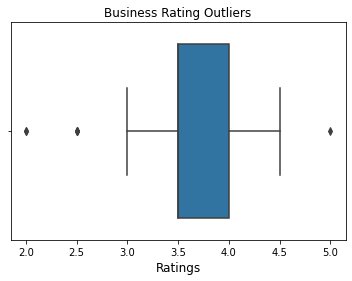

In [398]:
#Boxplot to check for Outliers

sns.boxplot(business_only['stars'])
plt.title('Business Rating Outliers')
plt.xlabel('Ratings', fontsize=12)
plt.show()

In [399]:
#Removing outliers
z = np.abs(stats.zscore(business_only['stars']))
business_only['SD Value'] = z

#Remove Business with this ID
remove_business = business_only[business_only['SD Value'] > 2].business_id

#Retain Remaining Business
business_only = business_only[business_only['SD Value'] < 2]

#Removing rows with reviews for business outliers
user_only = user_only[user_only['business_id'] != remove_business.any()]

c:\users\spongebob\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


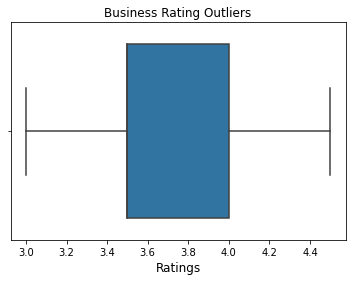

In [400]:
#Boxplot to check for Outliers

sns.boxplot(business_only['stars'])
plt.title('Business Rating Outliers')
plt.xlabel('Ratings', fontsize=12)
plt.show()

In [401]:
#Average rating for all the restaurants
business_only['stars'].mean()

3.6407185628742513

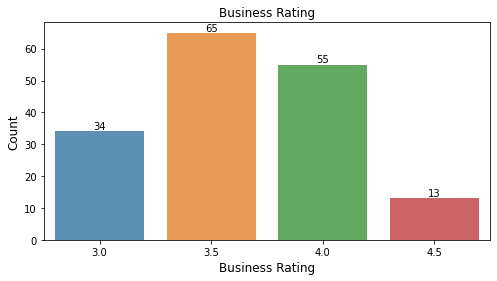

In [402]:
#Business Rating Graph
vertical_bar(business_only['stars'], 'Business Rating', 'Business Rating', 'Count')

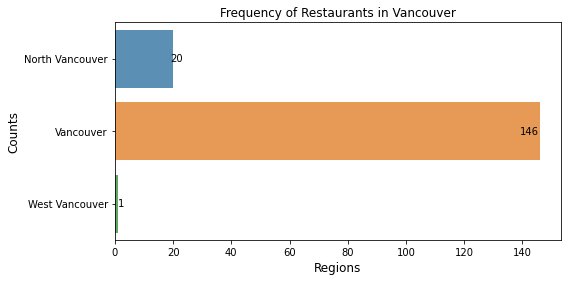

In [403]:
#Frequeny graph for different regions of Vancouver
horizontal_bar(business_only['city'], 'Frequency of Restaurants in Vancouver', 'Regions', 'Counts')

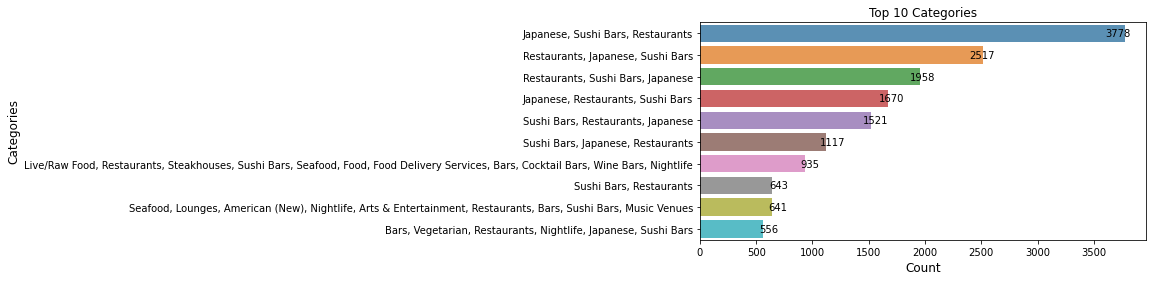

In [404]:
#Frequeny graph for Top 10 categories/cuisine
x=restaurant['categories'].value_counts()[:10]
#Plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x=x.values, y=x.index, alpha=0.8, orient='h')
plt.title("Top 10 Categories")
plt.ylabel('Categories', fontsize=12)
plt.xlabel('Count', fontsize=12)

#Text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    width = rect.get_width()
    ax.text(width/1.05, rect.get_y() + rect.get_height()/2, label,
                 ha='left', va='center')

plt.show()

In [405]:
#Average rating given by users
user_only['review_stars'].mean()

3.7625935162094764

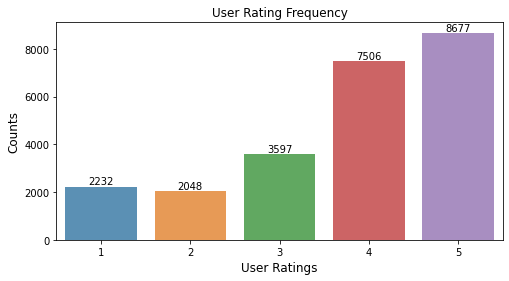

In [406]:
#User Ratings Graph
vertical_bar(user_only['review_stars'], 'User Rating Frequency','User Ratings', 'Counts')

In [407]:
#Normalize dataset by balancing user ratings

u5 = user_only.loc[user_only['review_stars'] == 5].sample(n=2200, random_state=11)
u4 = user_only.loc[user_only['review_stars'] == 4].sample(n=2200, random_state=11)
u3 = user_only.loc[user_only['review_stars'] == 3].sample(n=2200, random_state=11)
u2 = user_only.loc[user_only['review_stars'] == 2]
u1 = user_only.loc[user_only['review_stars'] == 1]
user_only = pd.concat([u1,u2,u3,u4,u5])

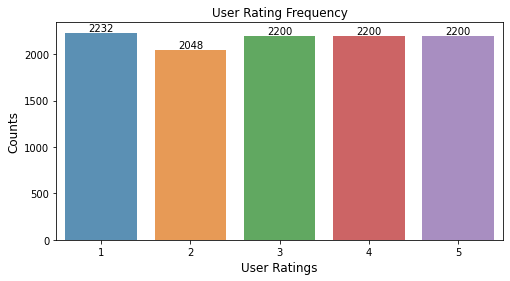

In [408]:
#User Ratings Graph
vertical_bar(user_only['review_stars'], 'User Rating Frequency','User Ratings', 'Counts')

In [409]:
#Transforming category column into corpus
categories_text = "".join(restaurant['categories'])
categories_text = categories_text.split(',')

In [410]:
#Counting category words
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(categories_text)

In [411]:
#Counts frequency of words and transforming into dictionary
word_list = vectorizer.get_feature_names()
count_list = X.toarray().sum(axis=0)
dict_words = dict(zip(word_list, count_list))

In [412]:
#Most common words in categories
new_dict_words = {k: v for k, v in sorted(dict_words.items(), key=lambda item: item[1], reverse=True)[:11]}


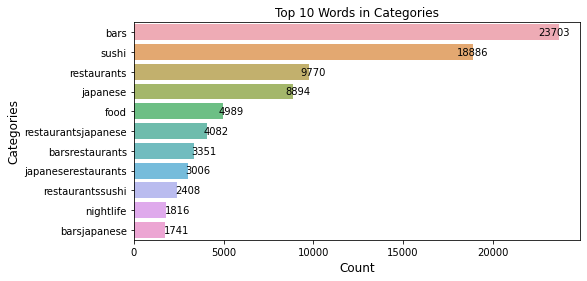

In [413]:
#Graph of most common word categories
plt.figure(figsize=(8,4))
ax = sns.barplot(x=list(new_dict_words.values()), y=list(new_dict_words.keys()), alpha=0.8, orient='h')
plt.title("Top 10 Words in Categories")
plt.ylabel('Categories', fontsize=12)
plt.xlabel('Count', fontsize=12)

#Text labels
rects = ax.patches
labels = list(new_dict_words.values())
for rect, label in zip(rects, labels):
    width = rect.get_width()
    ax.text(width/1.05, rect.get_y() + rect.get_height()/2, label,
                 ha='left', va='center')

plt.show()

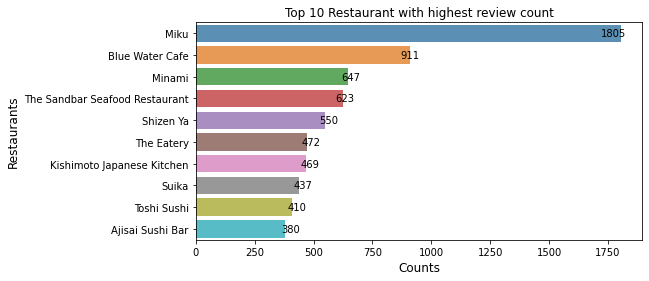

In [414]:
#Graph of Top Highest Review Count Restaurants
x=business_only['review_count'].sort_values(ascending=False)[:10].rename(index=business_only.name)

#Plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x=x.values, y=x.index, alpha=0.8, orient='h')
plt.title('Top 10 Restaurant with highest review count')
plt.ylabel('Restaurants', fontsize=12)
plt.xlabel('Counts', fontsize=12)

#Text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    width = rect.get_width()
    ax.text(width/1.05, rect.get_y() + rect.get_height()/2, label,
                 ha='left', va='center')
plt.show()

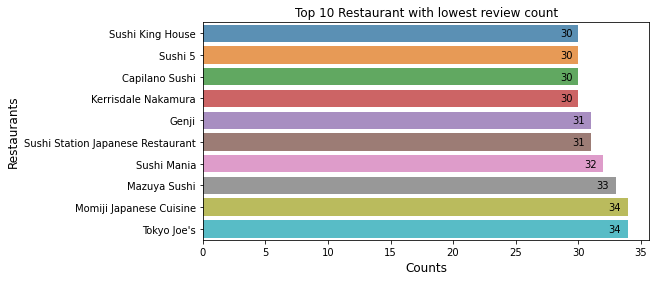

In [415]:
#Graph of Lowest Review Count Restaurants
x=business_only['review_count'].sort_values()[:10].rename(index=restaurant.name)

#Plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x=x.values, y=x.index, alpha=0.8, orient='h')
plt.title('Top 10 Restaurant with lowest review count')
plt.ylabel('Restaurants', fontsize=12)
plt.xlabel('Counts', fontsize=12)

#Text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    width = rect.get_width()
    ax.text(width/1.05, rect.get_y() + rect.get_height()/2, label,
                 ha='left', va='center')
plt.show()

In [416]:
#Exploratory Data Analysis: Sentiment Analysis

In [417]:
#Extracting positive and negative sentiments
#Extracting objective and subjective statements
df_sentiment = user_only[['name', 'text']]
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

In [418]:
#Creating columns for Polarity and Subjectivity
df_sentiment.loc[:,'Polarity'] = df_sentiment['text'].apply(pol)
df_sentiment.loc[:,'Subjectivity'] = df_sentiment['text'].apply(sub)
df_sentiment.head()


,name,text,Polarity,Subjectivity
6274,Hitoe Sushi Japanese Restaurant,I used to come here for the salmon belly but w...,-0.243750,0.608226
13746,Toshi Sushi,I want to marry chef toshi. I have been eatin...,0.111111,0.458333
23535,Tsuki Sushi Bar,My bad restaurant week continues...\nI went to...,-0.027392,0.550408
13372,Bistro Sakana,Went here for dinner with 3 friends. From star...,-0.191500,0.519500
2622,Ki-Isu Japanese Restaurant,This place has the smallest portion sizes I ha...,0.055556,0.505556


In [419]:
#Creating column for Polarity type
df_sentiment['Sentiment_Type'] = ''
df_sentiment.loc[df_sentiment.Polarity > 0, 'Sentiment_Type'] = 'Positive'
df_sentiment.loc[df_sentiment.Polarity < 0, 'Sentiment_Type'] = 'Negative'
df_sentiment.loc[df_sentiment.Polarity == 0, 'Sentiment_Type'] = 'Neutral'

In [420]:
#Creating column for Subjectivity type
df_sentiment['Subjectivity_Type'] = ''
df_sentiment.loc[df_sentiment.Subjectivity >= 0.5, 'Subjectivity_Type'] = 'Subjective'
df_sentiment.loc[df_sentiment.Subjectivity < 0.5, 'Subjectivity_Type'] = 'Objective'
df_sentiment.head()

,name,text,Polarity,Subjectivity,Sentiment_Type,Subjectivity_Type
6274,Hitoe Sushi Japanese Restaurant,I used to come here for the salmon belly but w...,-0.243750,0.608226,Negative,Subjective
13746,Toshi Sushi,I want to marry chef toshi. I have been eatin...,0.111111,0.458333,Positive,Objective
23535,Tsuki Sushi Bar,My bad restaurant week continues...\nI went to...,-0.027392,0.550408,Negative,Subjective
13372,Bistro Sakana,Went here for dinner with 3 friends. From star...,-0.191500,0.519500,Negative,Subjective
2622,Ki-Isu Japanese Restaurant,This place has the smallest portion sizes I ha...,0.055556,0.505556,Positive,Subjective


In [421]:
#Extracting restaurants with positive user reviews
user_only['Sentiment_Type'] = df_sentiment['Sentiment_Type']
#user_only = user_only[user_only['Sentiment_Type'] == 'Positive']

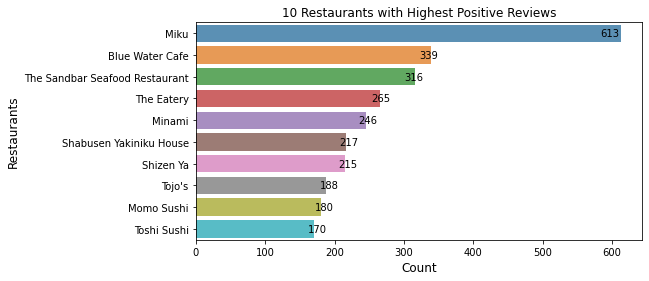

In [422]:
#Check relevancy of reviews for each restaurants.

x=user_only['name'].value_counts()[:10]

#Graph of most common word categories
plt.figure(figsize=(8,4))
ax = sns.barplot(x=x.values, y=x.index, alpha=0.8, orient='h')
plt.title("10 Restaurants with Highest Positive Reviews")
plt.ylabel('Restaurants', fontsize=12)
plt.xlabel('Count', fontsize=12)

#Text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    width = rect.get_width()
    ax.text(width/1.05, rect.get_y() + rect.get_height()/2, label,
                 ha='left', va='center')

plt.show()

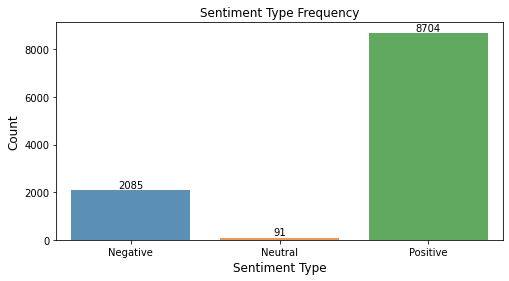

In [423]:
#Frequency graph of Polarity Type
vertical_bar(df_sentiment['Sentiment_Type'], 'Sentiment Type Frequency', 'Sentiment Type', 'Count')

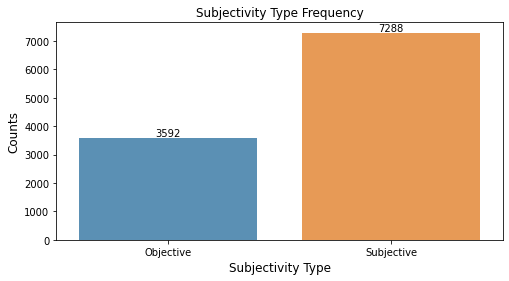

In [424]:
#Frequency graph of Subjectivity Type
vertical_bar(df_sentiment['Subjectivity_Type'], 'Subjectivity Type Frequency', 'Subjectivity Type', 'Counts')


In [425]:
#Creating Positive and Negative Corpus
Positive_Text = df_sentiment[df_sentiment['Sentiment_Type'] == 'Positive']
Negative_Text = df_sentiment[df_sentiment['Sentiment_Type'] == 'Negative']

In [426]:
#Combine dataframe text column
Positive_words = " ".join(Positive_Text.text)
Negative_words = " ".join(Negative_Text.text)


In [427]:
#Counts positive frequency of words
#Learn the vocabulary dictionary and return document-term matrix.
positive_count = vectorizer.fit_transform([Positive_words])
word_list = vectorizer.get_feature_names()
count_list = positive_count.toarray().sum(axis=0)
positive_combine = dict(zip(word_list, count_list))
new_dict_positive = {k: v for k, v in sorted(positive_combine.items(), key=lambda item: item[1], reverse=True)[:100]}


In [428]:
#Counts frequency negative words
#Learn the vocabulary dictionary and return document-term matrix.
negative_count = vectorizer.fit_transform([Negative_words])
word_list = vectorizer.get_feature_names()
count_list = positive_count.toarray().sum(axis=0)
negative_combine = dict(zip(word_list, count_list))
new_dict_negative = {k: v for k, v in sorted(negative_combine.items(), key=lambda item: item[1], reverse=True)[:100]}


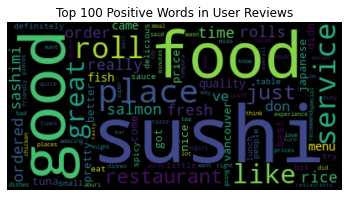

In [429]:
#Creating Wordcloud for Top 100 Positive words
wordcloud_pos = WordCloud().generate_from_frequencies(new_dict_positive)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title("Top 100 Positive Words in User Reviews")
plt.axis("off")
plt.show()

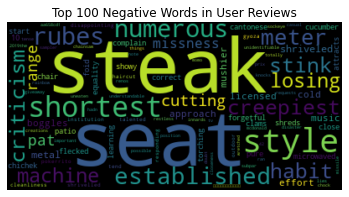

In [430]:
#Creating Wordcloud for Top 100 Negative words
wordcloud_neg = WordCloud().generate_from_frequencies(new_dict_negative)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title("Top 100 Negative Words in User Reviews")
plt.axis("off")
plt.show()

In [431]:
# Function that extract keys from the nested dictionary
def extract_keys(attr, key):
    if attr == None:
        return "{}"
    if key in attr:
        return attr.pop(key)

In [432]:
# convert string to dictionary
import ast
def str_to_dict(attr):
    if attr != None:
        return ast.literal_eval(attr)
    else:
        return ast.literal_eval("{}")


In [433]:
#Seperating nested dictionaries and creating columns for them
business_only['new_attributes'] = business_only.apply(lambda x: str_to_dict(x.attributes), axis=1)
business_only['Business_Parking'] = business_only.apply(lambda x: str_to_dict(extract_keys(x.new_attributes, 'BusinessParking')), axis=1)
business_only['Ambience'] = business_only.apply(lambda x: str_to_dict(extract_keys(x.new_attributes, 'Ambience')), axis=1)
business_only['Good_For_Meal'] = business_only.apply(lambda x: str_to_dict(extract_keys(x.new_attributes, 'GoodForMeal')), axis=1)
business_only['Dietary'] = business_only.apply(lambda x: str_to_dict(extract_keys(x.new_attributes, 'Dietary')), axis=1)
business_only['Music'] = business_only.apply(lambda x: str_to_dict(extract_keys(x.new_attributes, 'Music')), axis=1)
business_only.drop('attributes', axis=1, inplace=True)
business_only.head()


,business_id,name,address,city,stars,review_count,categories,SD Value,new_attributes,Business_Parking,Ambience,Good_For_Meal,Dietary,Music
0,mvCO6pRpfMB0_1GLlwgZRw,Sushi California,388 W Broadway,Vancouver,3.5,280,"Japanese, Restaurants, Sushi Bars",0.205396,"{'RestaurantsTakeOut': 'True', 'Alcohol': 'u'b...","{'garage': False, 'street': True, 'validated':...","{'romantic': False, 'intimate': False, 'classy...","{'dessert': False, 'latenight': False, 'lunch'...",{},{}
290,_aGG6e3dWYrKyFNpdK_vpA,Sushi Maki Japanese Cuisine,989 Hornby Street,Vancouver,3.0,37,"Restaurants, Japanese, Sushi Bars",1.198143,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","{'garage': False, 'street': True, 'validated':...","{'romantic': False, 'intimate': False, 'classy...","{'dessert': False, 'latenight': False, 'lunch'...",{},{}
328,hlnLIrUMGgLMFxphB3HCWw,Sushi Moon,6520 Fraser Street,Vancouver,3.5,46,"Sushi Bars, Japanese, Asian Fusion, Restaurants",0.205396,"{'WiFi': ''free'', 'RestaurantsDelivery': 'Fal...","{'garage': False, 'street': True, 'validated':...","{'touristy': None, 'hipster': None, 'romantic'...","{'dessert': False, 'latenight': False, 'lunch'...",{},{}
376,jrVEB7FPeD7zeLdYfmnwVg,Kuma Japanese Restaurant,3446 Dunbar Street,Vancouver,4.0,55,"Sushi Bars, Restaurants, Japanese",0.787351,"{'Alcohol': 'u'beer_and_wine'', 'RestaurantsPr...","{'garage': False, 'street': True, 'validated':...","{'touristy': False, 'hipster': False, 'romanti...","{'dessert': False, 'latenight': False, 'lunch'...",{},{}
435,szPJyzsly0a5ZkehLAV1fA,Pokérrito,558 Dunsmuir Street,Vancouver,4.0,182,"Food, Sushi Bars, Poke, Japanese, Restaurants,...",0.787351,"{'RestaurantsTableService': 'False', 'WiFi': '...",None,"{'romantic': False, 'intimate': False, 'classy...","{'dessert': False, 'latenight': False, 'lunch'...",{},{}


In [434]:
#Concatenate appropriate columns for dummie variables
df_attributes = pd.concat([business_only['new_attributes'].apply(pd.Series),
                                       business_only['Business_Parking'].apply(pd.Series),
                                       business_only['Ambience'].apply(pd.Series),
                                       business_only['Good_For_Meal'].apply(pd.Series),
                                       business_only['Dietary'].apply(pd.Series),
                                       ], axis=1)

In [435]:
#Dummies variable for attributes
df_attributes_dummies = pd.get_dummies(df_attributes)


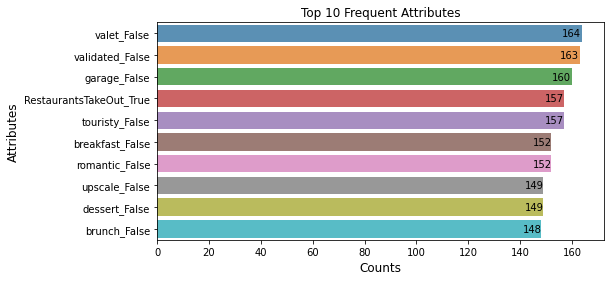

In [436]:
#Graph of Top Frequent Attributes
x=df_attributes_dummies.sum().sort_values(ascending=False)[:10]
#Plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x=x.values, y=x.index, alpha=0.8, orient='h')
plt.title('Top 10 Frequent Attributes')
plt.ylabel('Attributes', fontsize=12)
plt.xlabel('Counts', fontsize=12)

#Text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    width = rect.get_width()
    ax.text(width/1.05, rect.get_y() + rect.get_height()/2, label,
                 ha='left', va='center')
plt.show()

In [437]:
#Dummies variable for categories
#df_categories_dummies = pd.Series(business_only['categories']).str.get_dummies(',')
#df_categories_dummies

In [438]:
#Combining features, name and rating
#df_final = pd.concat([df_attributes_dummies, df_categories_dummies, business_only[['name', 'stars']]], axis=1)
#df_final.iloc[:,:-2]

In [439]:
#Loading surprise modules
from surprise import Reader, Dataset, SVD, NormalPredictor
from surprise.model_selection import cross_validate

user_ratings = user_only[['user_id', 'business_id', 'review_stars']]
reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(user_ratings, reader)
# Use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results.
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
#cross_validate(NormalPredictor(), data, cv=5)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.3265  1.3265  1.3350  1.3266  1.3176  1.3264  0.0055  
MAE (testset)     1.1346  1.1321  1.1305  1.1327  1.1157  1.1291  0.0068  
Fit time          0.53    0.52    0.53    0.54    0.53    0.53    0.00    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    


{'test_rmse': array([1.32654567, 1.32653349, 1.33495182, 1.3266056 , 1.31757622]),
 'test_mae': array([1.13460703, 1.13210099, 1.13054286, 1.13266377, 1.1157075 ]),
 'fit_time': (0.5259993076324463,
  0.5240163803100586,
  0.5299811363220215,
  0.5379824638366699,
  0.530015230178833),
 'test_time': (0.011000633239746094,
  0.009996175765991211,
  0.011013984680175781,
  0.011001348495483398,
  0.010984659194946289)}

In [440]:
#Creating training and testing set
from surprise.model_selection import train_test_split
from surprise import accuracy
trainset, testset = train_test_split(data, test_size=0.25)

# Train the algorithm on the trainset, and predict ratings for the testset
predictions = algo.fit(trainset).test(testset)

#Compute RMSE
accuracy.rmse(predictions)

RMSE: 1.3371


1.3371001330089218

In [441]:
#Evaluation Metric of SVD for Threshold, Precision, Recall and F1.
#Determines K value for Recommender

final = []
for threshold in np.arange(0, 6):
    tp=0
    fn=0
    fp=0
    tn=0
    temp = []
    for uid, _, true_r, est, _ in predictions:
        if(true_r>=threshold):
            if(est>=threshold):
                tp = tp+1
            else:
                fn = fn+1
        else:
            if(est>=threshold):
                fp = fp+1
            else:
                tn = tn+1
        if tp == 0:
            precision = 0
            recall = 0
            f1 = 0
        else:
            precision = tp / (tp + fp)
            recall = tp / (tp + fn)
            f1 = 2 * (precision * recall) / (precision + recall)
    temp = [threshold, tp,fp,tn ,fn, precision, recall, f1]
    final.append(temp)

results = pd.DataFrame(final)
results.rename(columns={0:'threshold', 1:'tp', 2: 'fp', 3: 'tn', 4:'fn', 5: 'Precision', 6:'Recall', 7:'F1'}, inplace=True)

In [442]:
#Display Evaluation Metric
results

,threshold,tp,fp,tn,fn,Precision,Recall,F1
0,0,2720,0,0,0,1.000000,1.000000,1.000000
1,1,2720,0,0,0,1.000000,1.000000,1.000000
2,2,2132,553,13,22,0.794041,0.989786,0.881174
3,3,931,365,729,695,0.718364,0.572571,0.637235
4,4,33,14,1610,1063,0.702128,0.030109,0.057743
5,5,0,0,2192,528,0.000000,0.000000,0.000000


In [443]:
#Retrieves precision and recall at K value.

def precision_recall_at_k(predictions, k, threshold):

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    #tp = n_rel_and_rec_k
    #fn =  n_rel - tp
    #fp = n_rec_k - tp
    return precisions, recalls

In [444]:
#Displays Preecision, Recall and F1-Score based on K values
results=[]
for i in range(2, 11):
    precisions, recalls = precision_recall_at_k(predictions, k=i, threshold=2.5)

    # Precision and recall can then be averaged over all users
    prec = sum(prec for prec in precisions.values()) / len(precisions)
    rec = sum(rec for rec in recalls.values()) / len(recalls)
    f1_score = 2 * (prec * rec) / (prec + rec)
    results.append({'K': i, 'Precision': prec, 'Recall': rec, 'F1-Score': f1_score})


results

[{'K': 2,
  'Precision': 0.6930046354825116,
  'Recall': 0.9333226309206084,
  'F1-Score': 0.7954080620676165},
 {'K': 3,
  'Precision': 0.6926534625649671,
  'Recall': 0.9372504163907452,
  'F1-Score': 0.7965988112371952},
 {'K': 4,
  'Precision': 0.6924076415226859,
  'Recall': 0.9380913919156652,
  'F1-Score': 0.7967396912089225},
 {'K': 5,
  'Precision': 0.6924287118977386,
  'Recall': 0.9386790212643564,
  'F1-Score': 0.7969655129026553},
 {'K': 6,
  'Precision': 0.6924006180643348,
  'Recall': 0.9390634719964682,
  'F1-Score': 0.7970854306548203},
 {'K': 7,
  'Precision': 0.6924307186001245,
  'Recall': 0.9392758479989834,
  'F1-Score': 0.7971818753530449},
 {'K': 8,
  'Precision': 0.6924457688680192,
  'Recall': 0.9394280229299193,
  'F1-Score': 0.7972466533912171},
 {'K': 9,
  'Precision': 0.6924106515762647,
  'Recall': 0.9395275219232235,
  'F1-Score': 0.7972592028210148},
 {'K': 10,
  'Precision': 0.6924200161873993,
  'Recall': 0.9395801978608552,
  'F1-Score': 0.7972843755

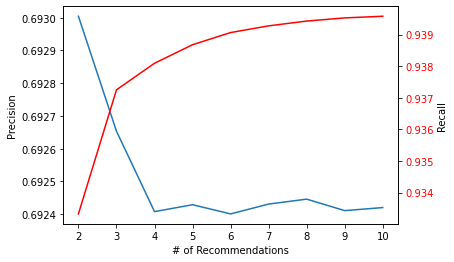

In [445]:
#Plot Precision and Recall on K values.

Rec=[]
Precision=[]
Recall=[]
for i in range(0,9):
    Rec.append(results[i]['K'])
    Precision.append(results[i]['Precision'])
    Recall.append(results[i]['Recall'])

plt.plot(Rec, Precision)
plt.xlabel('# of Recommendations')
plt.ylabel('Precision')
plt2 = plt.twinx()
plt2.plot(Rec, Recall, 'r')
plt.ylabel('Recall')
for tl in plt2.get_yticklabels():
    tl.set_color('r')

plt.show()

In [446]:
#Content Based Filtering using cosine similarity


In [447]:
#Construct a reverse map of indices and restaurant name
reset_business_only = business_only.reset_index()
indices = pd.Series(reset_business_only.index, index=business_only['name']).drop_duplicates()
indices


name
Sushi California                      0
Sushi Maki Japanese Cuisine           1
Sushi Moon                            2
Kuma Japanese Restaurant              3
Pokérrito                             4
                                   ... 
Tsuki Sushi Bar                     162
Kamei Royale Japanese Restaurant    163
Octopus Garden                      164
Sushi Yama                          165
Tomokazu                            166
Length: 167, dtype: int64

In [448]:
#Converting stars float into integer
mapper = {1.0:1,1.5:2, 2.0:2, 2.5:3, 3.0:3, 3.5:4, 4.0:4, 4.5:5, 5.0:5}
reset_business_only['stars'] = reset_business_only['stars'].map(mapper)

In [449]:
#Convert Dictionary attributes column to string
for x in range(len(business_only['new_attributes'])):
    reset_business_only['new_attributes'][x] = ', '.join([''.join(i) for i in reset_business_only['new_attributes'][x].items()])

In [450]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
reset_business_only['new_attributes'] = reset_business_only['new_attributes'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(reset_business_only['new_attributes'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(167, 73)

In [451]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [452]:
# Function that takes in restaurant names as input and outputs most similar restaurants
def content_recommend(name, cosine_sim=cosine_sim):
    # Get the index of the restaurants that matches the name
    idx = indices[name]

    # Get the pairwsie similarity scores of all restaurant with input
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the restaurants based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar restaurants
    sim_scores = sim_scores[1:11]

    # Get the restaurants indices
    restaurant_indices = [i[0] for i in sim_scores]
    value = [i[1] for i in sim_scores]

    # Return the top 3 most similar restaurants
    return list(zip(business_only['business_id'].iloc[restaurant_indices], value))

#Testing Content Based Filtering
cosine_results = content_recommend('Miku')
cosine_results
#business_id = 4EV_ZcQmjAmP3pmO-_nb2A
#name = Miku
#review_id = 3WC60wZp6yFdVXtBydvvTQ
#user_id = 	5tmfMwOEx0TfMTpeAzxsNQ
#review_stars = 5

[('EWwUwwhlshICZK7jFgaEjA', 0.6577686282508937),
 ('Lsgbq9gVqv5gpvSW5C2DlQ', 0.5988226547335018),
 ('gV9lrbWr1CE1Jl0E58UO2g', 0.5624433008290591),
 ('qebPYEXBp8Zo_d7GY50i2w', 0.5371654026486778),
 ('BcvuPbo3Enh9wrUvjbKSNA', 0.4910254397865245),
 ('_zDpNpn0n-HTt8JlWpHsDw', 0.46798586459345665),
 ('sz2eLUlDS6H0ict-qeyLHg', 0.4627510479327995),
 ('S6QRnCQVpEqQRyszrF51bw', 0.4589601637340649),
 ('DqjYN3cV72OFPP1m0NW12g', 0.4547091563733779),
 ('hVwbosAho2bofcnrBNEvWw', 0.4545881733408995)]

In [453]:
#Recall and Precision at K, top 10 recommended
tp = 0
fp = 0
tn = 0
fn = 0
cbf_star = []
for id, cos in cosine_results:
    if business_only[business_only['business_id'] == id].stars.item() >= 3:
        if cos >= 0.5:
            tp += 1
        else:
            fn += 1
    else:
        if cos < 0.5:
            tn += 1
        else:
            fp += 1

precision_cosine = tp/len(cosine_results)
recall_cosine = tp/(tp+fp)
print({'Precision': precision_cosine,  'Recall': recall_cosine})

{'Precision': 0.4, 'Recall': 1.0}


In [454]:
#Collaborative filtering using SVD


In [455]:
#Create column of average user ratings for each restaurant
average_user_rating = []
for i in user_only['name']:
    average_user_rating.append(user_only[user_only['name'] == i]['review_stars'].mean())
user_only['Average_User_Rating'] = average_user_rating
user_only.head()

,business_id,name,review_id,user_id,review_stars,text,Sentiment_Type,Average_User_Rating
6274,FmD4x9ClmSzSLKOTV7jfXw,Hitoe Sushi Japanese Restaurant,yBS909mh-0M7PlnWdKVfnQ,zyH5fQ4B79jHH-YSdWzuyg,1,I used to come here for the salmon belly but w...,Negative,3.242424
13746,cD-yIXTipTTN336R5c_MMg,Toshi Sushi,DCxI4p3VVG0nsHytb7D6tw,zxuKNsouUK2zCf1GweuVNw,1,I want to marry chef toshi. I have been eatin...,Positive,3.800000
23535,CjQMcgDgX_RdpSNby266oA,Tsuki Sushi Bar,qZiR91fqraubljhpYdAnhw,zxuKNsouUK2zCf1GweuVNw,1,My bad restaurant week continues...\nI went to...,Negative,3.076923
13372,0zErZVaaOhJUV1lNEqEc6Q,Bistro Sakana,3igwMJJS3_yKTFtN7d4Zlg,zu73CC-HNCL6JZy8F3-GRg,1,Went here for dinner with 3 friends. From star...,Negative,2.750000
2622,h53WO8lSukfQjXWWvr4rKg,Ki-Isu Japanese Restaurant,31PlUg7yhMNR_Ns1G-YU1Q,zq5mrahxKydEEedhAsAoOA,1,This place has the smallest portion sizes I ha...,Positive,2.632653


In [456]:
#Testing: Recommending restaurants
#business_id = 4EV_ZcQmjAmP3pmO-_nb2A
#name = Miku
#review_id = 3WC60wZp6yFdVXtBydvvTQ
#user_id = 	5tmfMwOEx0TfMTpeAzxsNQ
#review_stars = 5

algo.predict('5tmfMwOEx0TfMTpeAzxsNQ', '4EV_ZcQmjAmP3pmO-_nb2A')

Prediction(uid='5tmfMwOEx0TfMTpeAzxsNQ', iid='4EV_ZcQmjAmP3pmO-_nb2A', r_ui=None, est=3.3858105623753363, details={'was_impossible': False})

In [457]:
#Train and Fit Dataset
trainset = data.build_full_trainset()
algo.fit(trainset)

In [458]:
#Estimate Scores and Predict restaurants for user
user_only['Estimate_Score'] = business_only['business_id'].apply(lambda x: algo.predict('5tmfMwOEx0TfMTpeAzxsNQ', x).est)
user_only = user_only.sort_values('Estimate_Score', ascending=False)
user_only[['name','user_id','business_id', 'Average_User_Rating','Estimate_Score']][:4]

,name,user_id,business_id,Average_User_Rating,Estimate_Score
3585,Sushi Taku,bejJg5ELZWZk_h66t_g9rA,KfSeskh1ZH685ordhPUNFA,3.875000,3.566094
16785,Hachi Hana Japanese Restaurant,MLcsMp2h123Cuqnlk8xgVQ,t1rvBhnfDVKDLm_0Ai4ubQ,3.793103,3.482532
21914,Yui Japanese Bistro,YyKL9NmOEokXUvgJHcC2hw,uZGQy70xpYkUzQxTpKoXaA,3.466667,3.454805
6098,Shiro,KP-Q9VAu_huVSatL-hvaJQ,HIJlNqu7VKYAxFApilHg6w,3.616279,3.410600


In [459]:
# Hybrid Recommender
# Combining both Content based Filtering and Collaborative Filtering

def hybrid(userid, name):
    # Get the index of the restaurants that matches the title
    idx = indices[name]

    # Get the pairwsie similarity scores of all restaurants with the input
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the restaurants based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the most similar restaurants
    sim_scores = sim_scores[1:21]

    # Get the restaurants indices
    restaurant_indices = [i[0] for i in sim_scores]

    # Get restaurants with SVD after extracting similar restaurants
    restaurant = business_only.iloc[restaurant_indices][['business_id', 'name']]
    restaurant['Estimate_Score'] = restaurant['business_id'].apply(lambda x: algo.predict(userid, x).est)
    restaurant = restaurant.sort_values('Estimate_Score', ascending=False)

    return restaurant

#Calling hybrid function
hybrid_results = hybrid('5tmfMwOEx0TfMTpeAzxsNQ', 'Miku')
hybrid_results[:11]
#business_id = 4EV_ZcQmjAmP3pmO-_nb2A
#name = Miku
#review_id = 3WC60wZp6yFdVXtBydvvTQ
#user_id = 	5tmfMwOEx0TfMTpeAzxsNQ
#review_stars = 5

,business_id,name,Estimate_Score
4076,iMtUsHOqitE6Aau59K_XRg,Sushi Jin,4.018584
21957,S6QRnCQVpEqQRyszrF51bw,Ajisai Sushi Bar,3.783942
20453,sz2eLUlDS6H0ict-qeyLHg,Sushi Hub,3.773362
3721,DqjYN3cV72OFPP1m0NW12g,Mr. Sushi Lonsdale,3.636793
21548,TQj4HSCmm5GnriKMiSpqpQ,Raisu,3.401002
14644,34Fq-2nCOFN3gHPZLCqqJQ,Kimu Japanese Cuisine,3.345090
2414,hVwbosAho2bofcnrBNEvWw,Sansho Sushi & Japanese Dining,3.230510
17041,4WMFY6wWQNO3OsL5ykwGCQ,Sushi Mugen,3.213830
9724,EWwUwwhlshICZK7jFgaEjA,Naruto Sushi,3.138029
15839,gV9lrbWr1CE1Jl0E58UO2g,Minami,3.041146


In [460]:
#Performance Metric Hybrid Recommender
hybrid_metric = []
hybrid_recall_precision = []
for x in range(3, 16):
    actual_score = []
    predicted_score = []
    for id, name, score in hybrid_results.values[:x]:
        actual_score.append(user_only[user_only['business_id'] == id].Average_User_Rating.iloc[0])
        predicted_score.append(score)
    mse = mean_squared_error(actual_score, predicted_score)
    rmse = math.sqrt(mse)
    hybrid_recall_precision.append({'actual': actual_score, 'predict': predicted_score})
    hybrid_metric.append({'K': x, 'RMSE': rmse, 'MSE': mse})

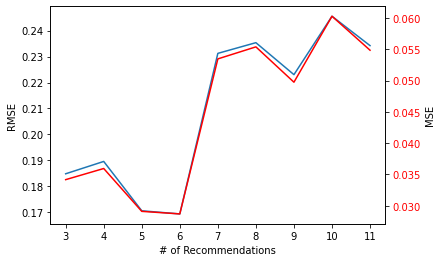

In [461]:
#Plot Precision and Recall on K values.

Rec=[]
RMSE=[]
MSE=[]
for i in range(0,9):
    Rec.append(hybrid_metric[i]['K'])
    RMSE.append(hybrid_metric[i]['RMSE'])
    MSE.append(hybrid_metric[i]['MSE'])

plt.plot(Rec, RMSE)
plt.xlabel('# of Recommendations')
plt.ylabel('RMSE')
plt2 = plt.twinx()
plt2.plot(Rec, MSE, 'r')
plt.ylabel('MSE')
for tl in plt2.get_yticklabels():
    tl.set_color('r')

plt.show()


In [462]:
#Recall and Precision
#Top 10 Recommendation Actual and Predicted Scores
hybrid_recall_precision = hybrid_recall_precision[7]


In [463]:
#Recall and Precision for Hybrid Recommender

for i in range(3,11):
    relevant = 0
    retrieved = 0
    rec_relevant = 0
    recall = []
    precision = []
    rec = []
    for x in range(2,i):
        if hybrid_recall_precision['actual'][x] >= 3:
            relevant += 1
            if hybrid_recall_precision['predict'][x] >= 3:
                rec_relevant += 1
        retrieved += 1
    rec.append(i)
    recall.append(rec_relevant/retrieved)
    precision.append(rec_relevant/relevant)
    print({'K': rec, 'Recall': recall, 'Precision': precision})

{'K': [3], 'Recall': [1.0], 'Precision': [1.0]}
{'K': [4], 'Recall': [1.0], 'Precision': [1.0]}
{'K': [5], 'Recall': [1.0], 'Precision': [1.0]}
{'K': [6], 'Recall': [1.0], 'Precision': [1.0]}
{'K': [7], 'Recall': [1.0], 'Precision': [1.0]}
{'K': [8], 'Recall': [1.0], 'Precision': [1.0]}
{'K': [9], 'Recall': [1.0], 'Precision': [1.0]}
{'K': [10], 'Recall': [1.0], 'Precision': [1.0]}
